In [167]:
from wcs_helper_functions import *
import numpy as np
from scipy import stats, spatial

In [168]:
munsellInfo = readChipData('./WCS_data_core/chip.txt')
indexCoord = munsellInfo[1]
coordIndex = munsellInfo[0]
cielabCoord = readClabData('./WCS_data_core/cnum-vhcm-lab-new.txt')

Text(0.5, 0, 'b')

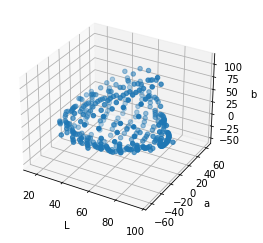

In [169]:
Ls = []
A = []
B = []
for index, coords in cielabCoord.items():
    L, a, b = np.array(coords).astype(np.float)
    Ls.append(L)
    A.append(a)
    B.append(b)
ax = plt.axes(projection='3d')
ax.scatter(Ls, A, B)
ax.set_xlabel("L")
ax.set_ylabel("a")
ax.set_zlabel("b")

In [170]:
def centroid(data):
    res = {}
    for lang, speakers in data.items():
        terms = {}
        for speaker, chips in speakers.items():
            for chip, term in chips.items():
                if term not in terms:
                    terms[term] = []
                terms[term].append(cielabCoord[chip])
        for t, coords in terms.items():
            terms[t] = np.mean(np.array(coords)[:, -3:].astype(np.float), axis=0)
        res[lang] = terms
    return res
centroid(namingData)[1]

{'LB': array([ 37.3253854 , -13.25516734,   2.23640974]),
 'LE': array([52.90576327, 41.20450612, 23.82702857]),
 'WK': array([59.15118717, 10.78465241, 27.25052406]),
 'LF': array([86.17827119, -4.04503955,  0.3179096 ]),
 'F': array([70.85285519, -4.31862022, 14.50961066]),
 'G': array([ 47.94192615, -13.62643713, -17.09810379]),
 'S': array([53.23678899,  2.80614679, 15.98816514]),
 'GB': array([ 42.95411765, -10.67647059,  17.17411765]),
 'FU': array([68.36385417, -7.22854167, 18.0975    ])}

In [171]:
def cloest_chips(centroid):
    res = {}
    coords = []
    chips = []
    for chip_index, coord in cielabCoord.items():
        chips.append(chip_index)
        coords.append(np.array(coord).astype(np.float))
    tree = spatial.KDTree(coords)
    for lang, terms in centroid.items():
        cloest_chip = {}
        for term, centroid in terms.items():
            cloest_chip[term] = coords[int(tree.query(centroid)[1])]
        res[lang] = cloest_chip
    return res
cloest_chips(centroid(namingData))[1]

{'LB': array([ 4.122e+01, -3.000e-02,  3.000e-02]),
 'LE': array([61.7 , 48.53, 25.92]),
 'WK': array([41.22,  9.31, 37.8 ]),
 'LF': array([ 8.135e+01, -5.000e-02,  6.000e-02]),
 'F': array([ 7.16e+01, -4.00e-02,  5.00e-02]),
 'G': array([ 41.22, -20.46, -17.64]),
 'S': array([ 5.157e+01, -3.000e-02,  4.000e-02]),
 'GB': array([ 30.77, -13.04,  21.97]),
 'FU': array([ 7.16e+01, -4.00e-02,  5.00e-02])}

In [172]:
def chip_select(data):
    total_chips = {}
    for lang, speakers in data.items():
        total_chips_term = {}
        term_lst = []
        for speaker, terms in speakers.items():
            for term, chips in terms.items():
                if term not in term_lst:
                    term_lst.append(term)
                    total_chips_term[term] = []
                total_chips_term[term].extend(chips)
        total_chips[lang] = total_chips_term
    return total_chips
chip_select(fociData)[1]["WK"]

['D:9',
 'D:10',
 'D:11',
 'D:12',
 'E:1',
 'E:3',
 'E:5',
 'C:10',
 'D:2',
 'D:3',
 'D:4',
 'D:5',
 'B:12',
 'E:2',
 'C:11',
 'D:38',
 'C:1',
 'C:2',
 'C:3',
 'C:4',
 'C:5',
 'D:6',
 'D:7',
 'C:4',
 'C:5',
 'C:6',
 'E:38',
 'E:39',
 'E:40',
 'B:16',
 'D:8',
 'D:5',
 'F:6',
 'F:35',
 'F:7',
 'F:8',
 'E:1',
 'C:1',
 'C:6',
 'C:7',
 'C:3',
 'C:4']

In [173]:
def foci(selected_chips):
    foci_res = {}
    for lang, terms in selected_chips.items():
        foci_term = {}
        for term, chips in terms.items():
            chips_dict = dict((chip, chips.count(chip)) for chip in set(chips))
            foci_term[term] = np.array(cielabCoord[coordIndex[max(
                chips_dict, key=chips_dict.get).replace(":", "")]]).astype(np.float)
        foci_res[lang] = foci_term
    return foci_res
foci(chip_select(fociData))[1]

{'LF': array([ 9.6e+01, -6.0e-02,  6.0e-02]),
 'WK': array([81.35, 21.06, 22.4 ]),
 'F': array([91.08,  5.21,  7.67]),
 'LB': array([15.6 , -0.02,  0.02]),
 'G': array([ 41.22,   7.17, -48.94]),
 'LE': array([41.22, 61.4 , 17.92]),
 'S': array([61.7 , 49.15, 56.82]),
 'GB': array([ 71.6 , -24.87,  85.15]),
 'FU': array([ 71.6 , -12.05, -29.46])}

In [174]:
namingData = readNamingData('./WCS_data_core/term.txt')
fociData = readFociData('./WCS_data_core/foci-exp.txt')

namingDataBK = readNamingData('./bk_data/BK-term.txt')
fociDataBK = readFociDataBK('./bk_data/BK-foci.txt')

In [175]:
centroids = {
    "bk": cloest_chips(centroid(namingDataBK)),
    "wcs": cloest_chips(centroid(namingData))
}

focus = {
    "bk": {lang: {term: colour for term, colour in terms.items() if term in centroids["bk"][lang]} for lang, terms in foci(chip_select(fociDataBK)).items()},
    "wcs": {lang: {term: colour for term, colour in terms.items() if term in centroids["wcs"][lang]} for lang, terms in foci(chip_select(fociData)).items()}
}

centroids = {
    "bk": {lang: {term: colour for term, colour in terms.items() if term in focus["bk"][lang]} for lang, terms in centroids["bk"].items()},
    "wcs": {lang: {term: colour for term, colour in terms.items() if term in focus["wcs"][lang]} for lang, terms in centroids["wcs"].items()}
}


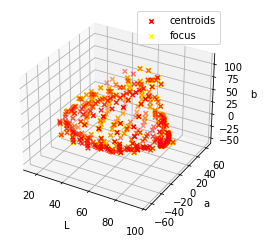

In [176]:
Lsc = []
Ac = []
Bc = []
for i,j  in centroids["wcs"].items():
    for k, l  in j.items():
        L, a, b = np.array(l).astype(np.float)
        Lsc.append(L)
        Ac.append(a)
        Bc.append(b)
Lsf = []
Af = []
Bf = []
for i,j  in focus["wcs"].items():
    for k, l  in j.items():
        L, a, b = np.array(l).astype(np.float)
        Lsf.append(L)
        Af.append(a)
        Bf.append(b)


ax = plt.axes(projection='3d')
ax.scatter(Ls, A, B, c="red", marker="x", label="centroids")
ax.scatter(Lsf,Af, Bf, c="yellow", marker="x", label="focus")
ax.set_xlabel("L")
ax.set_ylabel("a")
ax.set_zlabel("b")
ax.legend()


In [177]:
total_dist = []
for lang_wcs, terms_wcs in centroids["wcs"].items():
    dist = 0
    for term_wcs, coord_wcs in terms_wcs.items():
        for lang_bk, terms_bk in centroids["bk"].items():
            bks = []
            for term_bk, coord_bk in terms_bk.items():
                bks.append(coord_bk)
            tree = spatial.KDTree(bks)
            dist += tree.query(coord_wcs)[0]
    total_dist.append(dist)
print(total_dist[:10])
print("CS mean:", np.mean(total_dist))

[3386.479947851556, 11444.810169594253, 3859.500961845106, 7923.350943780291, 3305.648181071123, 13460.768969964978, 8645.602810005103, 4589.890292532931, 2615.2899078791997, 6693.804958537411]
CS mean: 5645.046205688967


In [178]:
total_dist_focus = []
for lang_wcs_focus, terms_wcs_focus in focus["wcs"].items():
    dist_bk_focus = 0
    for term_wcs_focus, coord_wcs_focus in terms_wcs_focus.items():
        for lang_bk_focus, terms_bk_focus in focus["bk"].items():
            bk_focus = []
            for term_bk_focus, coord_bk_focus in terms_bk_focus.items():
                bk_focus.append(coord_bk_focus)
            tree_focus = spatial.KDTree(bk_focus)
            dist_bk_focus += tree_focus.query(coord_wcs_focus)[0]
    total_dist_focus.append(dist_bk_focus)
print(total_dist_focus[:10])
print("FS mean:", np.mean(total_dist_focus))

[3738.8918637147012, 13647.580600201483, 3131.4790349303385, 8427.61021390781, 2691.5706689371705, 13051.013102684823, 8698.171198794149, 4358.784274172861, 2358.447302478546, 7199.790096907786]
FS mean: 5593.888682198148


In [179]:
print("p-value:", stats.ttest_rel(total_dist,  total_dist_focus)[1])

p-value: 0.3918045229384892
